# 1 - Introduction to Machine learning with scikit learn

Remember we make the following distinction:
* **Supervised** models try to predict a (dependent) variable, called the *target*, that is available during training time
* **Unsupervised** models try to find structure or patterns in the data, without a specific target

### Exercise: Supervised or unsupervised
For the following problems, do you think you need a supervised or unsupervised approach?
* Find numerical representations for words in a language (*word vectors*) that contain semantic information on the word
* Determine whether a tumor is benign or malign, based on an MRI-scan
* Predict the age of a  patient, based on an EEG-scan
* Cluster observations of plants into groups of individuals that have similar properties, possibly belonging to the same species
* Your own problem and dataset

## Machine learning workflow
For most machine learning approaches, we have to take the following steps:
* Data cleaning and preperation
* Split data into train and test set
* Optional: Feature selection
* Use cross validation to:
  * Train one or more ML models on the train set
  * Choose optimal model / parameter settings based on some metric
* Calculate final model performance on the test set

### Exercise: test set
Discuss in groups: Why is it important to reserve part of your data as test set? What can go wrong in choosing a test set?

In [1]:
import seaborn as sns
import pandas as pd

## Weather prediction dataset
Here we want to work with the weather prediction dataset. It contains daily weather observations from 18 different European cities or places through the years 2000 to 2010. For all locations the data contains the variables ‘mean temperature’, ‘max temperature’, and ‘min temperature’. In addition, for multiple of the following variables are provided: 'cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', but not all of them are provided for all locations. A more extensive description of the dataset including the different physical units is given in accompanying metadata file.

![map_locations](https://raw.githubusercontent.com/carpentries-incubator/deep-learning-intro/b09d4d5dc2f730478f3caf7e81542865afc333e3/fig/03_weather_prediction_dataset_map.png)

There are several tasks that one could think of given this data. For now, we are intested in the question: how difficult is it to predict the month given the weather data for  a particular day in that month. Since there are 12 different months, this is a multiclass classification problem.

Download the data using [this link](https://github.com/florian-huber/weather_prediction_dataset/raw/main/dataset/weather_prediction_dataset.csv), and save it in a `data` directory within the current directory.

In [2]:
weather = pd.read_csv('data/weather_prediction_dataset.csv')
weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [3]:
weather.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

## Exercise: explore weather
>
> Explore the dataset with pandas:
> 1. How many features do we have to predict the month?
> 2. Are the target classes of the dataset stored as numbers or strings?
> 3. How many samples does this dataset have?

In [4]:
# Nr of columns, nr of rows:
weather.shape

(3654, 165)

So we have 3654 samples. Of the 165 columns, the first column cannot be used and the second column is the target, so we have 163 features. The target column `Month` is denoted as a number from 1 to 12.

For the purposes of this workshp, we select only the first 3 years, and we remove the date column as this is neither a feature or target:

In [5]:
weather_3years = weather[:365*3].drop(columns=['DATE'])
print(weather_3years.shape)

(1095, 164)


### Split into train and test
Before doing further exploration of the data, we held out part of the data as test set for later. This way, no information from the test set will leak to the model we are going to create

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train, data_test = train_test_split(weather_3years, test_size=0.3, random_state=0)

In [8]:
len(data_train), len(data_test)

(766, 329)

We write the train and test set to csv files because we will be needing them later. We create the data directory if it does not exist.

In [9]:
import os

if not os.path.exists('data'):
    os.mkdir('data')
data_train.to_csv('data/weather_train.csv', index=False)
data_test.to_csv('data/weather_test.csv', index=False)

## Some more data exploration using visualization
Let's visualize the numerical feature columns.
One nice visualization for datasets with relatively few attributes is the Pair Plot.
This can be created using `sns.pairplot(...)`. It shows a scatterplot of each attribute plotted against each of the other attributes.
By using the `hue='MONTH'` setting for the pairplot the graphs on the diagonal are layered kernel density estimate plots.

Because we have so many features, we plot the features only for one city.

In [10]:
columns_basel = [c for c in data_train.columns if c.startswith('BASEL')]
data_plot = data_train[['MONTH']+columns_basel]

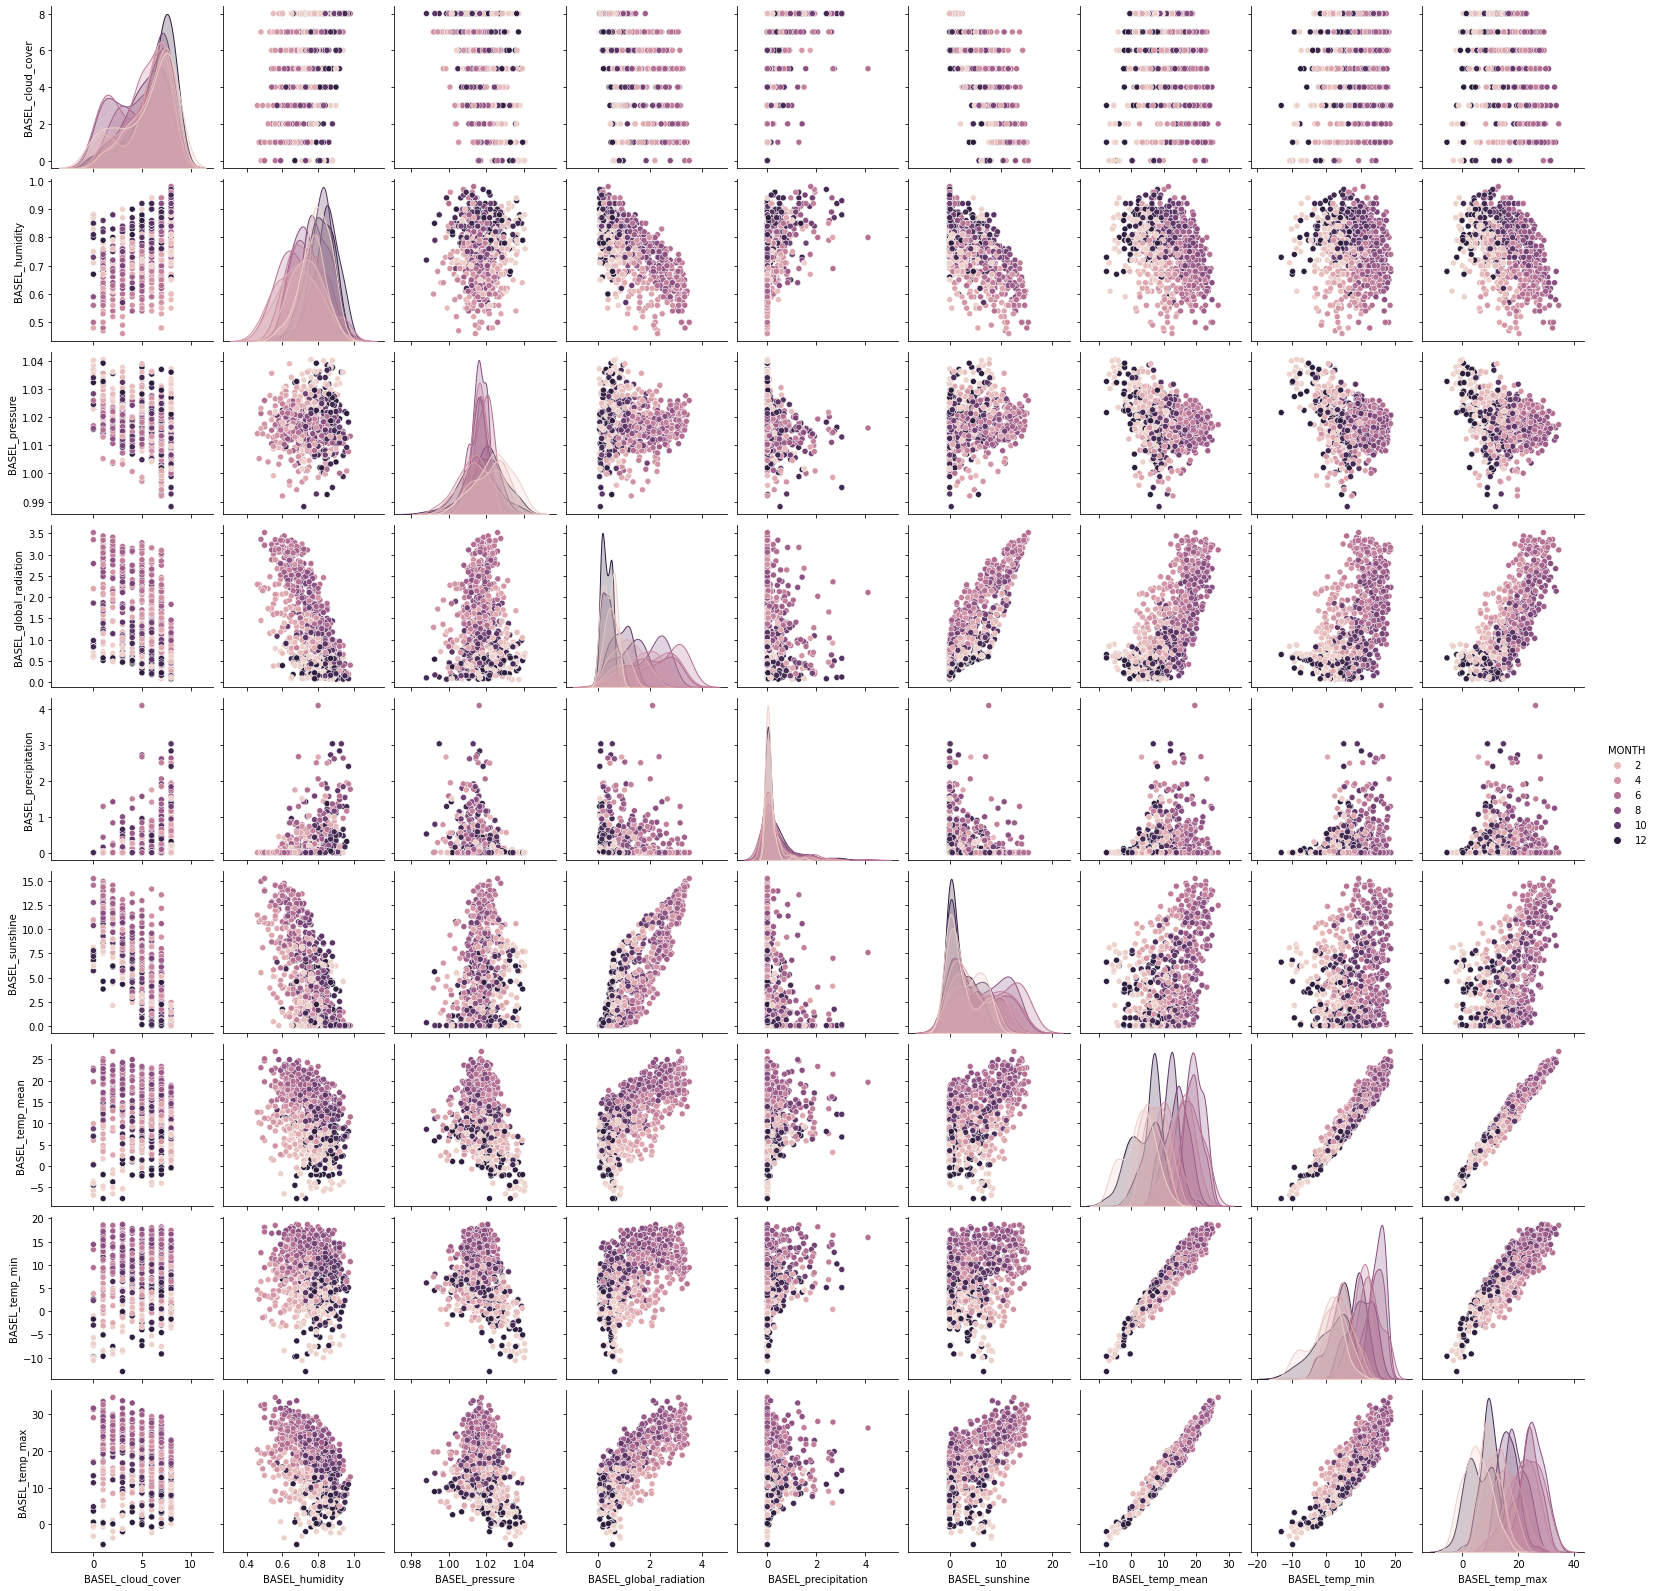

In [11]:
sns.pairplot(data_plot, hue='MONTH')

> ### Exercise: Create the pairplot using Seaborn
>
> Discuss what you see in the scatter plots and write down any observations. Think of:
> * Are the classes easily separable based on these features?
> * What are potential difficulties for a classification algorithm?
> * What do you note about the units of the different attributes?